# Titanic: Machine Learning from Disaster

## Introduction

$Description$: The Titanic disaster was one of the biggest disaster in the history of ship travel. From kaggle competition (https://www.kaggle.com/c/titanic) we have a lot of information about people in the ship deck. My aim will be forecast who will survive and who unfortunately not. This is a classification task so I use many of machine learning models to create the best one wihich answer the question: Who survived from this disaster ?

### Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import char
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/gender_submission.csv")

Table of Contents
```
1. Exploratory Data Analysis (EDA)
    1.1 Survived 
    1.2 Sex
    1.3 Age
    1.4 Pclass
    1.5 SibSp
    1.6 Parch
    1.7 Ticket
    1.8 Fare
    1.9 Cabin
    1.10 Embarked
    1.11 Name
2. Feature Engineering
    2.1 Creating new features
    2.1 Train test split
    2.2 Imputation
    2.3 One Hot Encoding
3. Modeling
    3.1 Logistic Regression
    3.2 Random Forest
    3.3 Ensemble model
    3.4 Adaboost
    3.5 XGBoost
```

## Exploratory Data Analysis (EDA)

One of the most important part during creating machine learning models is EDA. If we don't know the data we can't create accurate model. Usually during this step we find out that in some reason one of the feature or only part of some feature is more important than another. For example, in titanic disaster we can think that sex variable will be very important in our model because we know (from the internet, movie) that women had the priority to enter the lifeboat - in effect, if particular person was female then had higher probability that survive in contrast to to male person.

In [3]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
df_sub.head(1)

,PassengerId,Survived
0,892,0


We have 10 columns - without Survived target and PassengerId - index column. Let's check what are the types of them.

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Half of my features are numeric - Pclass, Age, SibSp, Parch, Fare. In my opinion Pclass, SibSp and Parch aren't numerical features - it will be better for model to convert it to categorical variables. The best for me is to create function for those calculation, because I wil have to repeat that things later on testing dataset. I will do it on Feature Engineering part.

In [7]:
print("Shape of train dataset: ", df_train.shape)
print("Shape of test dataset: ", df_test.shape)
print("Shape of sub dataset: ", df_sub.shape)

Shape of train dataset:  (891, 12)
Shape of test dataset:  (418, 11)
Shape of sub dataset:  (418, 2)


Titanic dataset don't have a lot of data. We have only 891 oservation for train, validate and test our model.

In [3]:
#### Packages options

## Plot figsize
def pyplot_options(width, length):
    plt.figure(figsize = (width, length))

## Seaborn style    
sns.set(style="ticks", color_codes=True)

In [10]:
#### Convert features
df_train['Survived'] = df_train['Survived'].astype('category')
df_train['Pclass'] = df_train['Pclass'].astype('category')
df_train['Name'] = df_train['Name'].astype('category')
df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Age'] = df_train['Age'].astype('float64')
df_train['SibSp'] = df_train['SibSp'].astype('category')
df_train['Parch'] = df_train['Parch'].astype('category')
df_train['Ticket'] = df_train['Ticket'].astype('category')
df_train['Fare'] = df_train['Fare'].astype('float64')
df_train['Cabin'] = df_train['Cabin'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

In [11]:
df_train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

Above I've done short introduction of my data look like. My only aim was to get to know how many columns I have and what is the shape of my datasets.

Only for exploratory data analysis part I would like to work on copy of df_train dataset - df_train_new. Here I would like to create new features, analyze them and understand my data. During that things I create new functions which will influence on df_train dataset. This functions I will test on df_train_new. After that part of analysis I will split df_train into train and test set. In next part I will use my functions on train dataset and create the model. Then I will use this functions on test dataset and chceck the performence of model. In the last part of my project I will predict survived target on submission data from this competition.

In [25]:
df_train_new = df_train.copy()

#### Quick introduce to the dataset

Nice way to quick introduce to the data is to create pairplot. This is the plots where you can see many of the relationships in your dataset in contrast to your target variable - in our case is of course survived variable.

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


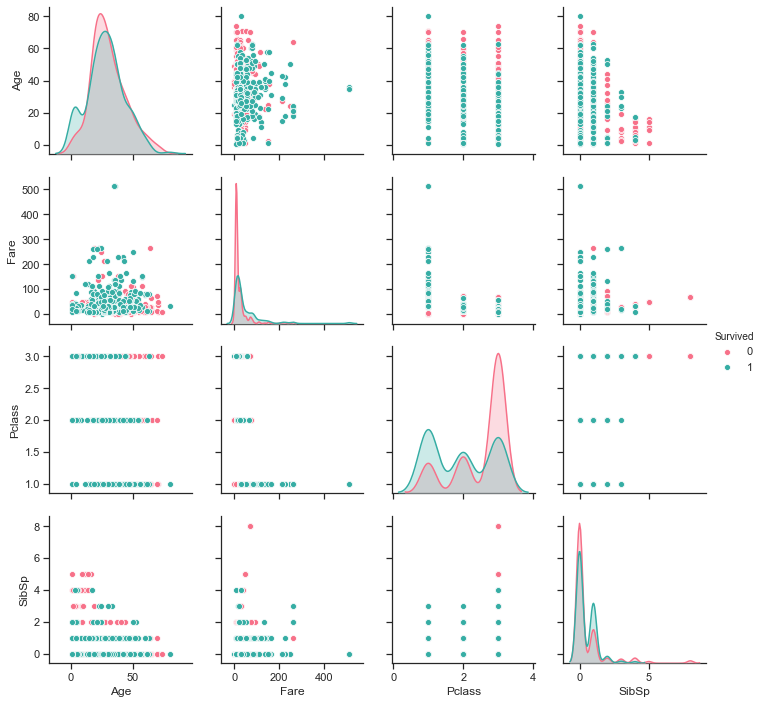

In [13]:
pair_plot_features = ['Age', 'Fare', 'Pclass', 'SibSp']
g = sns.pairplot(data=df_train_new, vars = pair_plot_features, hue='Survived', palette = 'husl')

Quick conclusions:
    1. People who pay for ticket not much money (may be they were from crew and pay 0) died more often than 
    rest of passengers
    2. People from lowest class died more often that people from highest class,
    3. People who pay not much money for ticket and were older have higher probability of died,
    4. Alone people (without any of parents or children on ship) died rarely than rest

Of course its only a few conclusions from this pair plot. May be they aren't good and will be not helpful but right now they are interesting for me and compatible with intuition.

#### Target: Survived

Below I create count plot to show that unfortunately in Titanic disaster died more people than survived. Right now we now that our dataset is unbalanced. In my opinion in that dataset it isn't a big problem. From this part we can take one conclusion - may be our metric have to be precision or recall ? Why because right now I can predict that everybody die and that model give me about 62% of accuracy.

In [26]:
people_died = 1 - np.round(np.sum(df_train_new.Survived)/len(df_train_new.Survived), 2)
print("People died in Titanic disaster (training dataset) : {}%".format((100*people_died).astype(int)))

People died in Titanic disaster (training dataset) : 62%


Text(0.5, 1.0, 'Number of survivors of the Titanic disaster')

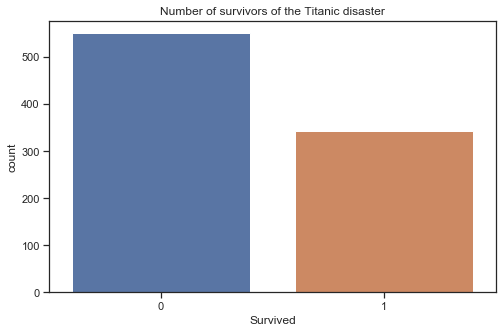

In [27]:
pyplot_options(8, 5)
sns.countplot(x="Survived", data = df_train_new)
plt.title("Number of survivors of the Titanic disaster")

#### Feature: Sex

In [14]:
df_train_new['Sex'] = df_train_new.Sex.map({'male':1, 'female':0})
df_train_new['Sex'] = df_train_new['Sex'].astype('category')

Text(0.5, 1.0, 'Number of Male and Female people survived from disaster')

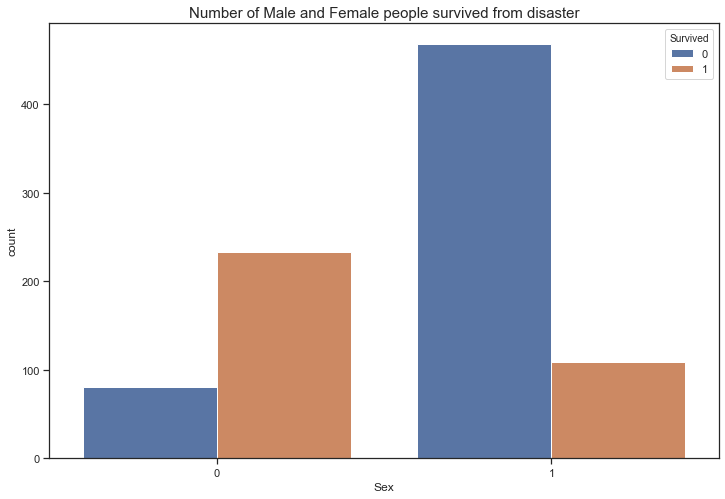

In [15]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x='Sex', hue = "Survived")
plt.title("Number of Male and Female people survived from disaster", fontsize=15)

In [16]:
df_train_new.Sex.isnull().value_counts()

False    891
Name: Sex, dtype: int64

Conclusion: Like I wrote before - women have higher probabilites of survied than men.

#### Feature: Age

Text(0.5, 1.0, 'Number of survivors in contrast to Age variable')

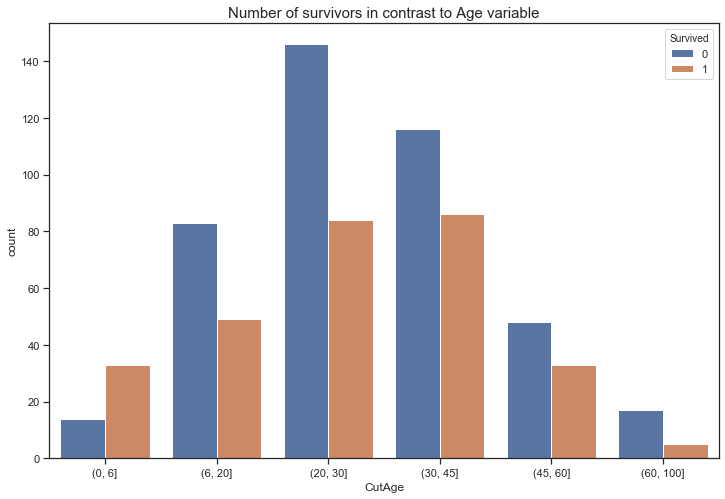

In [17]:
pyplot_options(12, 8)
age_cut=pd.cut(df_train_new.Age, bins = [0, 6, 20, 30, 45, 60, 100])
d = {"CutAge":age_cut, "Survived": df_train_new.Survived}
age_df = pd.DataFrame(data=d)
sns.countplot(data=age_df, x = "CutAge", hue = "Survived")
plt.title("Number of survivors in contrast to Age variable", fontsize = 15)

Conclusion: Age feature should have a big influence to accuracy of our model. We see that for example on medium age like 6-30 survived people have similar balance like all of people about 27.5%/62.5% (like I write at the beginning). Difference behaviour we see for age 0-6 where we see that kids in that age have highest probability of survived about 70%/30%. Different proportion have also ages 60-100 where that people have lowest probability of survived about 20%/80%.  

In [18]:
age_null_values = 100*(df_train_new[df_train_new.Age.isnull() == True].shape[0]/df_train_new.shape[0])
print("Almost {}% of people have Age NaN values".format(np.round(age_null_values, 2)))

Almost 19.87% of people have Age NaN values


Conclusion: I think that this is a quite big number of people who don't have value of age. During feature engineering step I will try to impute NaN values of one the cut interval.

#### Feature: Pclass

Text(0.5, 1.0, 'Countplot of Passanger Class in contrast to Survived')

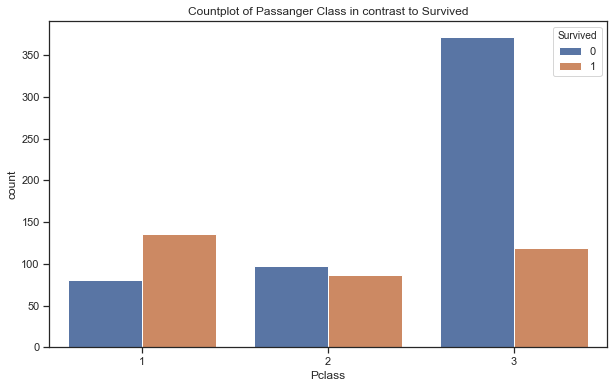

In [19]:
pyplot_options(10, 6)
sns.countplot(x = df_train.loc[:, 'Pclass'], hue = df_train.loc[:, 'Survived'])
plt.title("Countplot of Passanger Class in contrast to Survived")

Conclusion: Class nr 3 has huge impact to Survived target. Class nr 1 has some impact but in difference way tahn nr 3 - in class nr 1 Survived more than half people. 

#### Feature: SibSp

Text(0.5, 1.0, 'Number of sibilings aboard to Titanic in contrast to Survived')

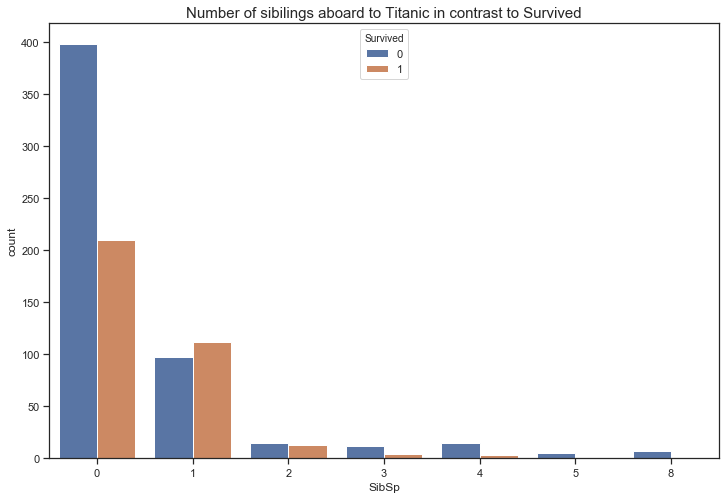

In [20]:
pyplot_options(12, 8)
sns.countplot(data = df_train_new, x='SibSp', hue ='Survived')
plt.title("Number of sibilings aboard to Titanic in contrast to Survived", fontsize=15)

Conclusion: When people didn't have sibilings then probability of survived decreased. 

#### Feature: Parch

Text(0.5, 1.0, 'Number of Parents or Children aboard to Titanic in contrast to Survived')

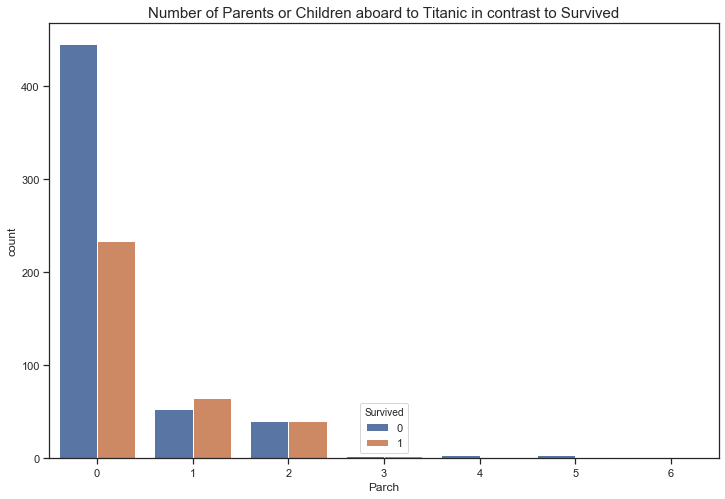

In [21]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = 'Parch', hue = 'Survived')
plt.title("Number of Parents or Children aboard to Titanic in contrast to Survived", fontsize=15)

Conclusion: Parch variable equal to 3, 4, 5 or 6 don't have any influence into the dataset. Parch equal to similar. We see that when passenger didn't have any child or parent survived rarely than passenger who had any close person.

#### Feature: Ticket

In [22]:
ticket_counts = df_train_new.Ticket.value_counts()
ticket_counts = pd.DataFrame({'Ticket':ticket_counts.index, 'PassengerTicket':ticket_counts}).reset_index().drop(['index'],axis=1)

In [23]:
df_train_new = pd.merge(df_train_new, ticket_counts, left_on='Ticket', right_on = 'Ticket', how='left')
df_train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTicket
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


Text(0.5, 1.0, 'Number of people on one ticket in contrast to survivors')

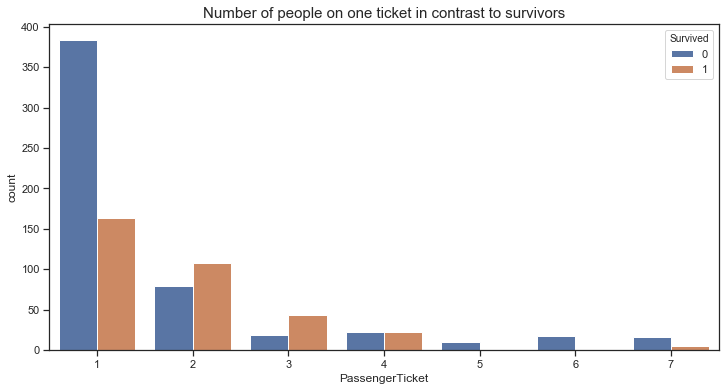

In [24]:
pyplot_options(12, 6)
sns.countplot(data=df_train_new, x="PassengerTicket", hue="Survived")
plt.title("Number of people on one ticket in contrast to survivors", fontsize=15)

Text(0.5, 1.0, 'Number of people on one ticket (greater than 2) in contrast to survivors')

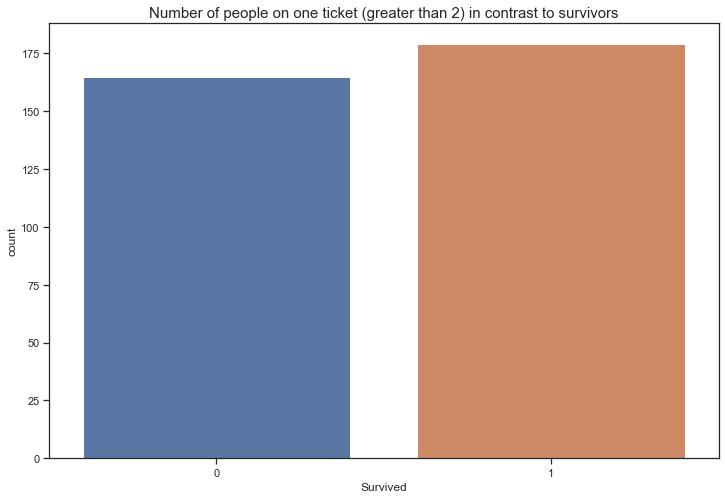

In [25]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new[df_train_new.PassengerTicket >= 2 ], x="Survived")
plt.title("Number of people on one ticket (greater than 2) in contrast to survivors", fontsize=15)

Conclusion: People who traveled with somebody (in the same ticket) had more chance to survived than people who traveled alone.

#### Feature: Fare

Text(0.5, 1.0, 'Boxplot of Fare in contrast to Survived')

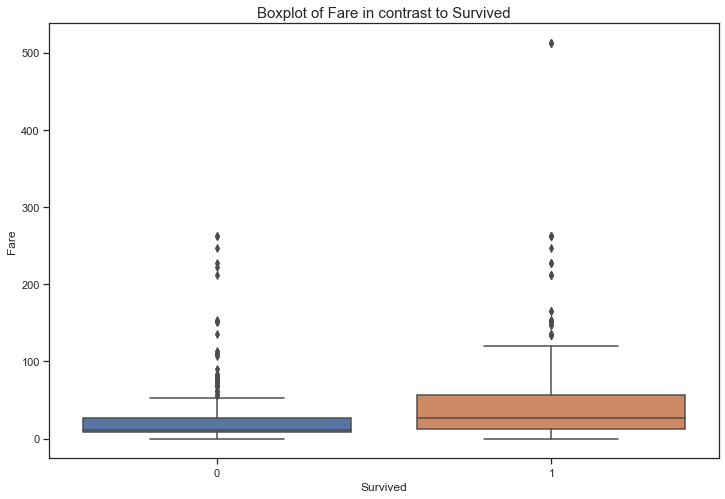

In [26]:
pyplot_options(12, 8)
sns.boxplot(data=df_train_new, x = "Survived", y="Fare", orient="v")
plt.title("Boxplot of Fare in contrast to Survived", fontsize=15)

Text(0.5, 1.0, 'Countplot interval of Fare in contrast to Survived')

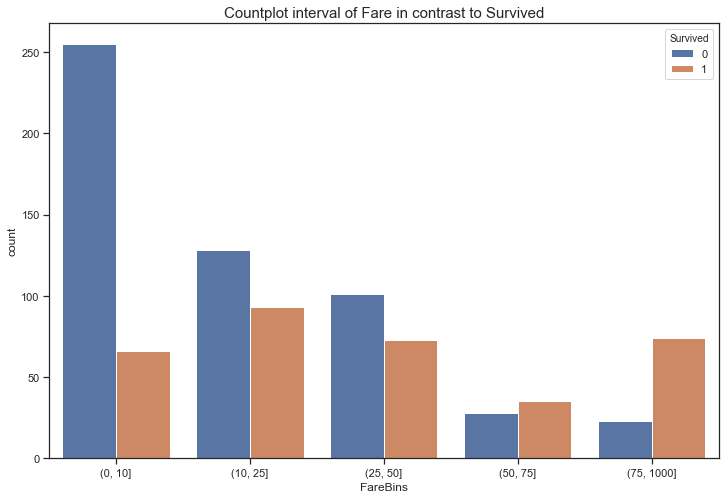

In [27]:
df_train_new['FareBins'] = pd.cut(df_train_new.Fare, bins=[0, 10, 25, 50, 75, 1000])
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = "FareBins", hue="Survived")
plt.title("Countplot interval of Fare in contrast to Survived", fontsize=15)

Conclusion: Value of fare had big influence of Surivived during Titanic disaster.

#### Feature: Cabin

In [28]:
cabin_counts = df_train_new.Cabin.value_counts()
cabin_counts = pd.DataFrame({'Cabin':cabin_counts.index, 'PassengerCabin':cabin_counts}).reset_index().drop(['index'],axis=1)

In [29]:
df_train_new2 = pd.merge(df_train_new.copy(), cabin_counts, left_on='Cabin', right_on = 'Cabin', how='left')
df_train_new2.PassengerCabin[df_train_new2.PassengerCabin.isna() == True] = 0
df_train_new2.head()

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTicket,FareBins,PassengerCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(0, 10]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,"(50, 75]",1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(0, 10]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,"(50, 75]",2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,"(0, 10]",0.0


Text(0.5, 1.0, 'Number of Passengers who have cabin in contrast to Survived')

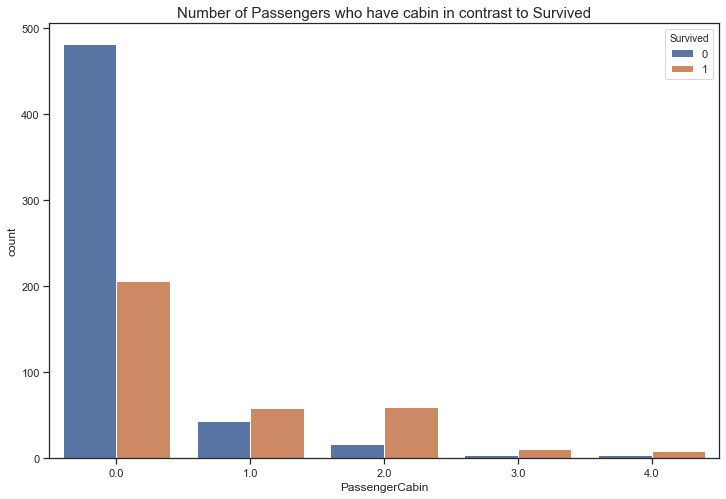

In [30]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new2, x="PassengerCabin", hue="Survived")
plt.title("Number of Passengers who have cabin in contrast to Survived", fontsize=15)

Conclusion: People who didn't have cabin died more often than people who had. 

#### Feature: Embarked

Text(0.5, 1.0, 'Number of Embarked in contrast to Survived')

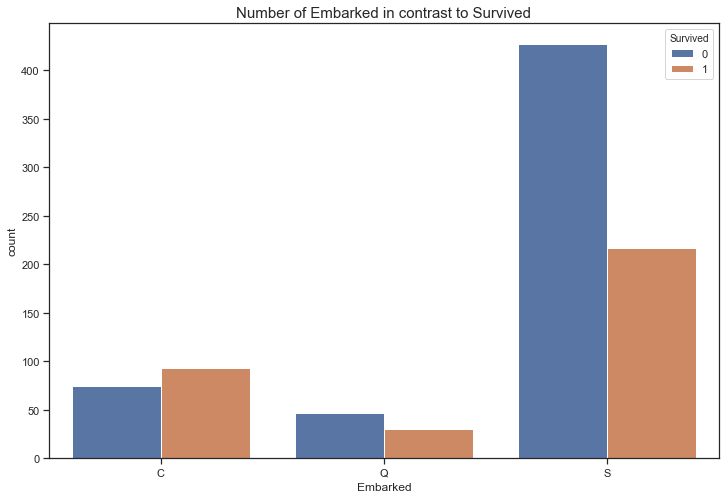

In [31]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = "Embarked", hue="Survived")
plt.title("Number of Embarked in contrast to Survived", fontsize=15)

In [28]:
df_train_new.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Conlcusion: Most of passengers embarked in Southampton - about 75%. Unfortunately more than half of them died in disaster. May be it was coincidence, but we can't skip it in our analysis.

#### Feature: Name

In [32]:
df_train_new.Name.value_counts()

van Melkebeke, Mr. Philemon                1
Goldschmidt, Mr. George B                  1
Graham, Miss. Margaret Edith               1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Goodwin, Mr. Charles Edward                1
                                          ..
Nilsson, Miss. Helmina Josefina            1
Nicola-Yarred, Miss. Jamila                1
Nicola-Yarred, Master. Elias               1
Nicholson, Mr. Arthur Ernest               1
Abbing, Mr. Anthony                        1
Name: Name, Length: 891, dtype: int64

Conclusion: It will be difficult to show in some plot this variable. I will spend more time analyzing this feature during Feature Engineering part.

## Feature Engineering

#### Set index: PassengerId

In [2]:
def set_index_data(data):
    data.set_index('PassengerId', inplace=True)
    return print("Complete")

#### Convert features

In [3]:
def convert_features(data, columns, type):
    for i in columns:
        data.loc[:, i] = data.loc[:, i].astype(type) 
    return data

#### Feature: Age

In [4]:
def feature_engineering_agebins(data, bins=[0, 6, 20, 30, 45, 60, 100], inplace=False):
    data['AgeBins']=pd.cut(data.Age, bins=bins, right=False, labels=bins[:-1])
    print("Complete")
    return data

#### Feature: Name

Now let's see on Name feature. We see that there are some names, surnames but also titles like Miss, Mr or Master. May be it will be important for our model. Of course titles like Mr. or Miss. are in Sex variable but Master is something else. Let's try to find there some pattern !!

In [36]:
df_train_new = df_train.copy()

In [37]:
set_index_data(df_train_new)

Complete


In [38]:
df_name = df_train_new.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
df_name.rename(columns={"Part_Name_1":"Surname", "Part_Name_2":"Title_Name"}, inplace=True)
df_name_2.rename(columns = {"Part_Name_1":"Title", "Part_Name_2":"Surname", "Part_Name_3":"Rest"}, inplace=True)

In [39]:
df_name.head(1)

,Surname,Title_Name
PassengerId,,
1,Braund,Mr. Owen Harris


In [40]:
df_name_2.head(1)

,Title,Surname,Rest
PassengerId,,,
1,Mr,Owen Harris,None


In [41]:
df_name_2.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

We see that all of this title have whitespaces. Let's remove them.

In [42]:
df_name_2['Title'] = df_name_2.Title.str.strip()
df_name_2['Surname'] = df_name_2.Surname.str.strip()
df_name_2['Rest'] = df_name_2.Rest.str.strip()

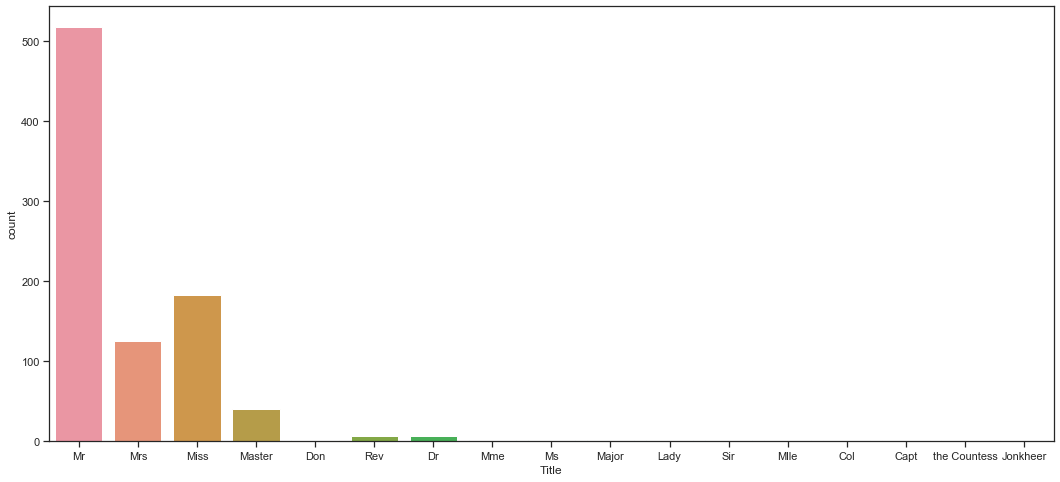

In [43]:
pyplot_options(18, 8)
sns.countplot(data=df_name_2, x = "Title")

We see that on the ship were some people with title different from Mr or Miss. In my opinion titles like: Mr, Miss, Mrs, Master, Ms we can drop. Rest of them may be important in my model. Let's check it in some visualization. 

This feature will be helpful during Imputation process. My dataset have a lot of missing data in Age feature. With title variable I will calculate mean of age feature in all of titles and then I will impute NA values by that average.

In [44]:
normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
unusual_titles = ('Dr', 'Rev', 'Mlle', 'Col', 'Capt', 'the Countess', 'Mme', 'Lady')

In [45]:
df_plot = pd.merge(df_name_2, pd.DataFrame(df_train_new), how='inner', left_on='PassengerId', right_on='PassengerId') 
df_plot['NormalTitle'] = df_plot.Title.isin(normal_titles).astype(int)

In [46]:
df_plot.head(1)

,Title,Surname,Rest,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NormalTitle
PassengerId,,,,,,,,,,,,,,,
1,Mr,Owen Harris,None,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


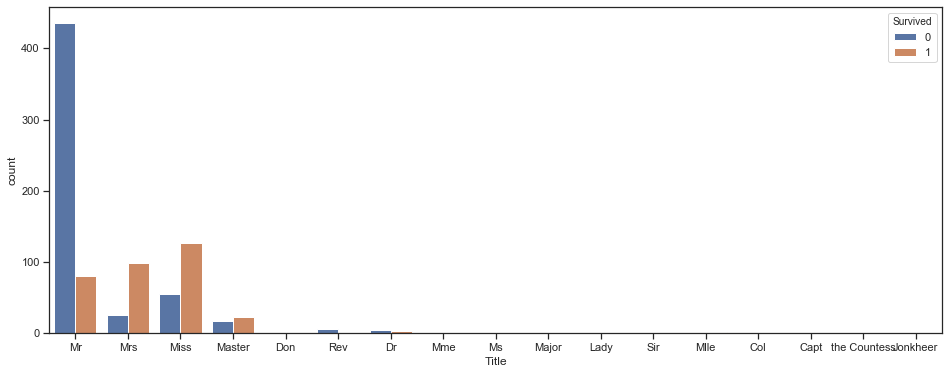

In [47]:
pyplot_options(16, 6)
sns.countplot(x='Title', hue = 'Survived', data = df_plot)

In [48]:
df_plot['Youth'] = df_plot.Title.isin(['Miss', 'Master']).astype(int)

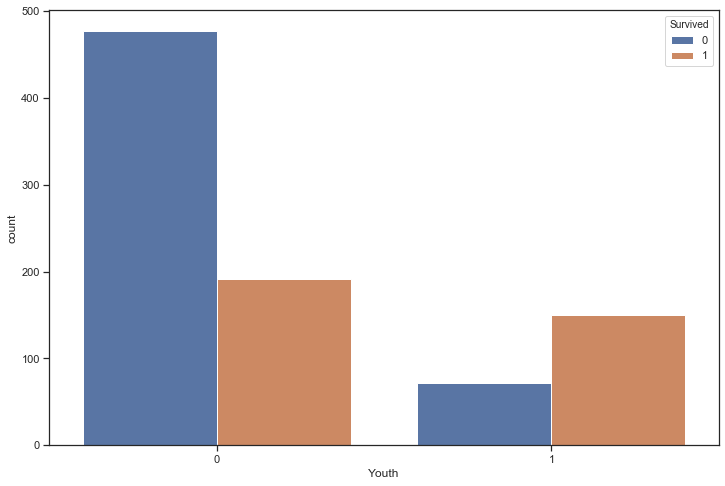

In [49]:
pyplot_options(12, 8)
sns.countplot(x='Youth', hue ='Survived', data=df_plot)

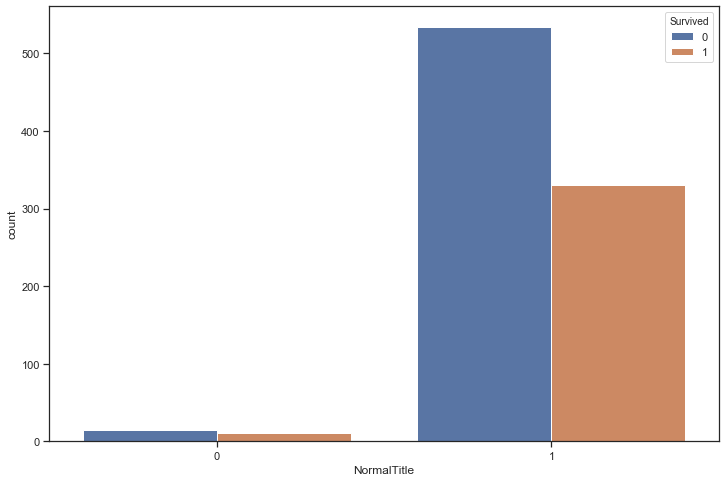

In [50]:
pyplot_options(12, 8)
sns.countplot(x='NormalTitle', hue ='Survived', data=df_plot)

Summarizing column Name isn't so important. I think that the best feature which i can pull from it is feature Youth and NormalTitle like  I show above. Rest of column isn't important - in my opinion of course. Let's create function with all of operation which I've done above.

In [5]:
def feature_engineering_name(data):
    
    # Copy input dataset
    df = data.copy()
    
    # Split Name feature into several columns
    df_name = df.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    
    # Rename new features and remove whitespaces
    df_name_2.rename(columns = {"Part_Name_1":"Title"}, inplace=True)
    df_name_2['Title'] = df_name_2.Title.str.strip()
    
    # Create vector with normal titles
    normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
    
    # Create new variables 
    df_name_2['NormalTitle'] = df_name_2.Title.isin(normal_titles).astype(int)
    df_name_2['Youth'] = df_name_2['Title'].isin(['Miss', 'Master']).astype(int)
    df_name_2 = df_name_2.loc[:, ('Title', 'NormalTitle', 'Youth')]
    
    df = pd.merge(df, df_name_2, how="inner", on="PassengerId")
    return df

Moreover I create function for imputation Nan values form Age feature. Replacing Nan values by average of Mr, Mrs or Youth title will be ea good idea. More accurate than application of most frequent metric.

In [52]:
df_plot.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [53]:
age_youth = np.round(df_plot[df_plot.Youth == 1]['Age'].mean())
age_adult = np.round(df_plot[df_plot.Youth == 0]['Age'].mean())
age_mr = np.round(df_plot[df_plot.Title == 'Mr']['Age'].mean())
age_mrs = np.round(df_plot[df_plot.Title == 'Mrs']['Age'].mean())

print("Youth Age:", age_youth)
print("Adult Age:", age_adult)
print("Mr Age:", age_mr)
print("Mrs Age:", age_mrs)

Youth Age: 18.0
Adult Age: 34.0
Mr Age: 32.0
Mrs Age: 36.0


In [54]:
df_plot.loc[(df_plot.Title == 'Mr') & (df_plot.Age.isnull()), 'Age']  = age_mr

In [55]:
df_plot.loc[(df_plot.Title == 'Mrs') & (df_plot.Age.isnull()), 'Age']  = age_mrs

In [56]:
df_plot.loc[(df_plot.Youth == 1) & (df_plot.Age.isnull()), 'Age']  = age_youth

In [57]:
df_plot.loc[(df_plot.Youth == 0) & (df_plot.Age.isnull()), 'Age']  = age_adult

In [58]:
df_plot.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

#### Feature: Age

In [6]:
def imputation_age(df):
    age_youth = np.round(df[df.Youth == 1]['Age'].mean())
    age_mr = np.round(df[df.Title == 'Mr']['Age'].mean())
    age_mrs = np.round(df[df.Title == 'Mrs']['Age'].mean())
    age_adult = np.round(df[df.Youth == 0]['Age'].mean())
    
    df.loc[(df.Youth == 1) & (df.Age.isnull()), 'Age']  = age_youth
    df.loc[(df.Title == 'Mr') & (df.Age.isnull()), 'Age']  = age_mr
    df.loc[(df.Title == 'Mrs') & (df.Age.isnull()), 'Age']  = age_mrs
    df.loc[(df.Youth == 0) & (df.Age.isnull()), 'Age']  = age_adult
    return df

#### Feature: Ticket

In [7]:
def feature_passenger_ticket(data):
    ticket_counts = data.Ticket.value_counts()
    ticket_counts = pd.DataFrame({'Ticket':ticket_counts.index, 
                                  'PassengerTicket':ticket_counts}).reset_index().drop(['index'],axis=1) 
    data = pd.merge(data, ticket_counts, left_on='Ticket', right_on = 'Ticket', how='left')
    data['PassengerTicketGT2'] = 0
    data['PassengerTicketGT2'][data.PassengerTicket >= 2] = 1
    print("Complete")
    return data

#### Feature: Cabin

In [8]:
def feature_passenger_cabin(data):
    cabin_counts = data.Cabin.value_counts()
    cabin_counts = pd.DataFrame({'Cabin':cabin_counts.index, 
                                 'PassengerCabin':cabin_counts})\
    .reset_index()\
    .drop(['index'],axis=1)
    data = pd.merge(data, cabin_counts, left_on='Cabin', right_on = 'Cabin', how='left')
    data.PassengerCabin[data.PassengerCabin.isna() == True] = 0
    data['PassengerCabinGT2'] = 0
    data['PassengerCabinGT2'][data.PassengerCabin >= 2] = 1
    print("Complete")
    return data

In [9]:
def feature_engineering_newcabin(data):
    data['NewCabin']=char.ljust(np.array(data.Cabin.replace(np.nan, 'X')).astype(str), width=0)
    print("Complete")
    return data

#### Feature: Fare

In [10]:
def feature_engineering_farebins(data, bins=[0, 10, 25, 50, 75, 1000]):
    data['FareBins']=pd.cut(data.Fare, bins=bins, right=False, labels=bins[:-1])
    print('Complete')
    return data

## Modelling

First one I will split df_train for training and testing datasets. On training dataset I will create new features and build the model and on testing dataset I will use the same functions to create features like on training dataset and check the performence of the model. 

Before split I use PassengerId like index variable. In my opinion PassengerId isn't necessary feature to increase performence the model - it's great feature for index my data.

#### Load dataset

In [11]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data//test.csv")
df_sub = pd.read_csv("../data/gender_submission.csv")

#### Train, test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train.loc[:, 'Survived']
X_test = df_test.copy()
y_test = df_sub.loc[:, 'Survived']

In [14]:
X = df_train.copy().drop(['Survived'], axis=1)
y = df_train.loc[:, 'Survived']

In [15]:
np.random.seed(23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
print('Shape of training features: ', X_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (623, 11)
Shape of testing features:  (268, 11)
Shape of training target:  (623,)
Shape of testing target:  (268,)


#### Feature Engineering

In [17]:
set_index_data(X_train)
set_index_data(X_test)
set_index_data(df_test)
set_index_data(df_train)

Complete
Complete
Complete
Complete


In [18]:
X_train.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [19]:
category_columns =  ('Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked')
float_columns = ('Age', 'Fare')

In [20]:
X_train=convert_features(X_train, columns = category_columns, type = 'category')
X_train=convert_features(X_train, columns = float_columns, type = 'float64')

X_test=convert_features(X_test, columns = category_columns, type = 'category')
X_test=convert_features(X_test, columns = float_columns, type = 'float64')

df_test = convert_features(df_test, columns = category_columns, type = 'category')
df_test = convert_features(df_test, columns = float_columns, type = 'float64')

df_train = convert_features(df_train, columns = category_columns, type = 'category')
df_train = convert_features(df_train, columns = float_columns, type = 'float64')

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
X_train=feature_engineering_name(X_train)
X_test=feature_engineering_name(X_test)
df_test=feature_engineering_name(df_test)
df_train=feature_engineering_name(df_train)

In [22]:
X_train = imputation_age(X_train)
X_test = imputation_age(X_test)
df_train = imputation_age(df_train)
df_test = imputation_age(df_test)

In [23]:
X_train=feature_engineering_agebins(X_train, inplace=False)
X_test=feature_engineering_agebins(X_test, inplace=False)
df_test=feature_engineering_agebins(df_test, inplace=False)
df_train=feature_engineering_agebins(df_train, inplace=False)

Complete
Complete
Complete
Complete


In [24]:
X_train=feature_passenger_ticket(X_train)
X_test=feature_passenger_ticket(X_test)
df_test=feature_passenger_ticket(df_test)
df_train=feature_passenger_ticket(df_train)

Complete
Complete
Complete
Complete


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
X_train=feature_passenger_cabin(X_train)
X_test=feature_passenger_cabin(X_test)
df_test=feature_passenger_cabin(df_test)
df_train=feature_passenger_cabin(df_train)

Complete
Complete
Complete
Complete


C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
X_train=feature_engineering_newcabin(X_train)
X_test=feature_engineering_newcabin(X_test)
df_test=feature_engineering_newcabin(df_test)
df_train=feature_engineering_newcabin(df_train)

Complete
Complete
Complete
Complete


In [27]:
X_train=feature_engineering_farebins(X_train)
X_test=feature_engineering_farebins(X_test)
df_test=feature_engineering_farebins(df_test)
df_train=feature_engineering_farebins(df_train)

Complete
Complete
Complete
Complete


In [28]:
X_train.dtypes

Pclass                category
Name                  category
Sex                   category
Age                    float64
SibSp                 category
Parch                 category
Ticket                category
Fare                   float64
Cabin                 category
Embarked              category
Title                   object
NormalTitle              int32
Youth                    int32
AgeBins               category
PassengerTicket          int64
PassengerTicketGT2       int64
PassengerCabin         float64
PassengerCabinGT2        int64
NewCabin                object
FareBins              category
dtype: object

In [29]:
category_columns = ('Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins')
float_columns = ('Age', 'Fare', 'NormalTitle', 'Youth', 'PassengerTicketGT2', 'PassengerCabinGT2')

In [30]:
X_train=convert_features(X_train, columns = category_columns, type = 'category')
X_train=convert_features(X_train, columns = float_columns, type = 'float64')

X_test=convert_features(X_test, columns = category_columns, type = 'category')
X_test=convert_features(X_test, columns = float_columns, type = 'float64')

df_test = convert_features(df_test, columns = category_columns, type = 'category')
df_test = convert_features(df_test, columns = float_columns, type = 'float64')

df_train = convert_features(df_train, columns = category_columns, type = 'category')
df_train = convert_features(df_train, columns = float_columns, type = 'float64')

In [31]:
X_train = X_train.drop(['Name', 'Ticket',  'Cabin', 'Title'], axis=1)
X_test = X_test.drop(['Name', 'Ticket',  'Cabin', 'Title'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin', 'Title'], axis=1)
df_train = df_train.drop(['Name', 'Ticket',  'Cabin', 'Title'], axis=1)

In [32]:
df_test.dtypes

Pclass                category
Sex                   category
Age                    float64
SibSp                 category
Parch                 category
Fare                   float64
Embarked              category
NormalTitle            float64
Youth                  float64
AgeBins               category
PassengerTicket       category
PassengerTicketGT2     float64
PassengerCabin        category
PassengerCabinGT2      float64
NewCabin              category
FareBins              category
dtype: object

#### Categorical Variables

In [33]:
from sklearn.impute import SimpleImputer 

In [34]:
def na_values(data, feature):
    return data[data[feature].isna() == True].shape[0]

def number_of_class(data, feature):
    return len(data[feature].unique())

In [35]:
def isin_feature(df_train, df_test, feature):
    unique_values = df_train[feature].unique()
    data_test = df_test.copy()
    data_test.loc[data_test[feature].isin(unique_values), feature] = data_test[feature]
    data_test.loc[~data_test[feature].isin(unique_values), feature] = np.nan
    return data_test

In [36]:
features = ['FareBins', 'AgeBins', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NewCabin', 'PassengerCabin', 'PassengerCabinGT2', 'PassengerTicket', 'PassengerTicketGT2']
for i in features:
    print("NA values in {} feature: {}".format(i, na_values(df_test, i)))
    print("Number of class in {} feature: {}".format(i, number_of_class(df_test, i)))
    print()

NA values in FareBins feature: 1
Number of class in FareBins feature: 6

NA values in AgeBins feature: 0
Number of class in AgeBins feature: 6

NA values in Pclass feature: 0
Number of class in Pclass feature: 3

NA values in Sex feature: 0
Number of class in Sex feature: 2

NA values in SibSp feature: 0
Number of class in SibSp feature: 7

NA values in Parch feature: 0
Number of class in Parch feature: 8

NA values in Embarked feature: 0
Number of class in Embarked feature: 3

NA values in NewCabin feature: 0
Number of class in NewCabin feature: 8

NA values in PassengerCabin feature: 0
Number of class in PassengerCabin feature: 4

NA values in PassengerCabinGT2 feature: 0
Number of class in PassengerCabinGT2 feature: 2

NA values in PassengerTicket feature: 0
Number of class in PassengerTicket feature: 5

NA values in PassengerTicketGT2 feature: 0
Number of class in PassengerTicketGT2 feature: 2



In [37]:
X_test = isin_feature(X_train, X_test, 'Parch')
df_test = isin_feature(df_train, df_test, 'Parch')

In [38]:
categorical_columns = ('Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins')
categorical_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(X_train.loc[:, categorical_columns])
X_train.loc[:, categorical_columns] = categorical_imputer.transform(X_train.loc[:, categorical_columns])
X_test.loc[:, categorical_columns] = categorical_imputer.transform(X_test.loc[:, categorical_columns])
df_test.loc[:, categorical_columns] = categorical_imputer.transform(df_test.loc[:, categorical_columns])
df_train.loc[:, categorical_columns] = categorical_imputer.transform(df_train.loc[:, categorical_columns])

#### One Hot Encoding

In [39]:
category_columns = ('Pclass',  'Sex', 'SibSp', 'Parch', 'Embarked',  'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins')
float_columns = ('Age', 'Fare', 'NormalTitle', 'Youth', 'PassengerTicketGT2', 'PassengerCabinGT2')

In [40]:
X_train=convert_features(X_train, columns = category_columns, type = 'category')
X_train=convert_features(X_train, columns = float_columns, type = 'float64')

X_test=convert_features(X_test, columns = category_columns, type = 'category')
X_test=convert_features(X_test, columns = float_columns, type = 'float64')

df_test = convert_features(df_test, columns = category_columns, type = 'category')
df_test = convert_features(df_test, columns = float_columns, type = 'float64')

df_train = convert_features(df_train, columns = category_columns, type = 'category')
df_train = convert_features(df_train, columns = float_columns, type = 'float64')

In [41]:
X_train.dtypes

Pclass                category
Sex                   category
Age                    float64
SibSp                 category
Parch                 category
Fare                   float64
Embarked              category
NormalTitle            float64
Youth                  float64
AgeBins               category
PassengerTicket       category
PassengerTicketGT2     float64
PassengerCabin        category
PassengerCabinGT2      float64
NewCabin              category
FareBins              category
dtype: object

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder_features = ['Pclass',  'Sex', 'SibSp', 'Parch', 'Embarked',  'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins']
encoder = OneHotEncoder()
encoder.fit(df_train.loc[:, encoder_features])
encoding_features_train=encoder.transform(X_train.loc[:, encoder_features]).toarray()
encoding_features_test=encoder.transform(X_test.loc[:, encoder_features]).toarray()
encoding_features_df_test=encoder.transform(df_test.loc[:, encoder_features]).toarray()
encoding_features_df_train=encoder.transform(df_train.loc[:, encoder_features]).toarray()

In [43]:
X_train.drop(columns=encoder_features, inplace=True)
X_test.drop(columns=encoder_features, inplace=True)
df_test.drop(columns=encoder_features, inplace=True)
df_train.drop(columns=encoder_features, inplace=True)

In [44]:
df_encoding_train = pd.DataFrame(encoding_features_train, index=X_train.index)
df_encoding_train.columns = encoder.get_feature_names(encoder_features)

df_encoding_test = pd.DataFrame(encoding_features_test, index=X_test.index)
df_encoding_test.columns = encoder.get_feature_names(encoder_features)

df_encoding_df_test = pd.DataFrame(encoding_features_df_test, index=df_test.index)
df_encoding_df_test.columns = encoder.get_feature_names(encoder_features)

df_encoding_df_train = pd.DataFrame(encoding_features_df_train, index=df_train.index)
df_encoding_df_train.columns = encoder.get_feature_names(encoder_features)

In [45]:
X_train=pd.concat([X_train, df_encoding_train], join='outer', axis=1, ignore_index=False)
X_test=pd.concat([X_test, df_encoding_test], join='outer', axis=1, ignore_index=False)
df_test=pd.concat([df_test, df_encoding_df_test], join='outer', axis=1, ignore_index=False)
df_train=pd.concat([df_train, df_encoding_df_train], join='outer', axis=1, ignore_index=False)

In [46]:
print("Shape of train data ", X_train.shape)
print("Shape of test data ", X_test.shape)
print("Shape of test data ", df_test.shape)
print("Shape of training data ", df_train.shape)

Shape of train data  (623, 60)
Shape of test data  (268, 60)
Shape of test data  (418, 60)
Shape of training data  (891, 61)


In [47]:
X = df_train.drop(['Survived'], axis=1)
y = df_train.loc[:, 'Survived']

In [48]:
X_train.dtypes

Age                   float64
Fare                  float64
NormalTitle           float64
Youth                 float64
PassengerTicketGT2    float64
PassengerCabinGT2     float64
Pclass_1              float64
Pclass_2              float64
Pclass_3              float64
Sex_female            float64
Sex_male              float64
SibSp_0               float64
SibSp_1               float64
SibSp_2               float64
SibSp_3               float64
SibSp_4               float64
SibSp_5               float64
SibSp_8               float64
Parch_0               float64
Parch_1               float64
Parch_2               float64
Parch_3               float64
Parch_4               float64
Parch_5               float64
Parch_6               float64
Embarked_C            float64
Embarked_Q            float64
Embarked_S            float64
AgeBins_0             float64
AgeBins_6             float64
AgeBins_20            float64
AgeBins_30            float64
AgeBins_45            float64
AgeBins_60

In [49]:
X_train.shape

(623, 60)

## Feature Importance

#### Recursive feature elimination

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [52]:
batch_size = 300
sample_rows = np.random.randint(0, X_train.shape[0], batch_size)
X_train_fi = X_train.loc[sample_rows, :]
y_train_fi = y_train.iloc[sample_rows]
print("Feature Importance training set:", X_train_fi.shape)
print()
print("Feature Importance training target set:", y_train_fi.shape)

Feature Importance training set: (300, 60)

Feature Importance training target set: (300,)


In [58]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=5, cv=StratifiedKFold(5), scoring='recall')

rfecv.fit(X_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ppatrzalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Optimal number of features: 5


In [54]:
rfecv_results = pd.DataFrame({'Columns':X_train.columns, 'Ranking':rfecv.ranking_})
rfecv_results[rfecv_results.Ranking == 1]

,Columns,Ranking
2,NormalTitle,1
3,Youth,1
4,PassengerTicketGT2,1
5,PassengerCabinGT2,1
7,Pclass_2,1
8,Pclass_3,1
9,Sex_female,1
10,Sex_male,1
11,SibSp_0,1
12,SibSp_1,1


In [55]:
feature_selection_array = np.array(rfecv_results[rfecv_results.Ranking == 1].Columns)

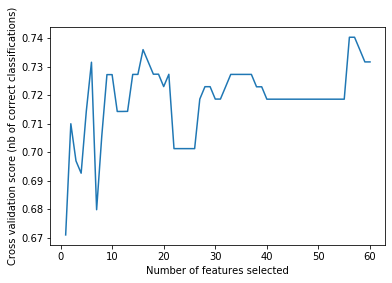

In [57]:
#pyplot_options(12, 8)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Model I: Logistic Regression

In [ ]:
X_train_new = X_train[feature_selection_array]
X_test_new = X_test[feature_selection_array]

In [ ]:
X_train_new.columns

Below I choose the list of features which in my opinion could be important during modelling of Survived from Titanic disaster.

In [ ]:
my_features = np.array(['Sex', "AgeBins_0", "AgeBins_6", "AgeBins_20", "AgeBins_30", "AgeBins_45", "AgeBins_60", "Pclass_3", "Parch_0", "PassengerCabinGT2", 
                        "PassengerTicketGT2", "SibSp_0", "SibSp_1"])
X_train_my = X_train[my_features]
X_test_my = X_test[my_features]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def logistic_regression_grid_search(X_train, X_test, y_train, y_test):

    grid_param = [
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'class_weight' : ['balanced']},
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['l1'],
        'solver' : ['liblinear'],
        'class_weight' : ['balanced']},
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['elasticnet'],
        'solver' : ['saga'],
        'class_weight' : ['balanced'],
        'l1_ratio' : [0.1, 0.3, 0.5, 0.7]}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []

    for score in scores:
        model_logistic = LogisticRegression()
        model_logistic_gs = GridSearchCV(estimator=model_logistic, param_grid=grid_param, cv=5, scoring=score)
        model_logistic_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", model_logistic_gs.best_params_)
        print()
        print("Training score: %s" % model_logistic_gs.score(X_train, y_train))
        print("Testing score: %s" % model_logistic_gs.score(X_test, y_test))
        best_params = np.append(best_params, model_logistic_gs.best_params_)
    return best_params
    

In [ ]:
best_params_all = logistic_regression_grid_search(X_train, X_test, y_train, y_test)

In [ ]:
best_params_rfecv_features = logistic_regression_grid_search(X_train_new, X_test_new, y_train, y_test)

In [ ]:
best_params_my_features = logistic_regression_grid_search(X_train_my, X_test_my, y_train, y_test)

#### Save results 

In [ ]:
import pickle

In [ ]:
filename1 = "logistic_reg_my.sav"
filename2 = "logistic_reg_new.sav"
pickle.dump(best_params_rfecv_features, open(filename1, 'wb'))
pickle.dump(best_params_my_features, open(filename2, 'wb'))

## Model II: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'criterion' : ['gini', 'entropy'],
        'min_samples_split' : [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
        'min_samples_split' : [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
        'bootstrap' : [True, False],
        'random_state' : [123],
        'class_weight' : ['balanced', 'balanced_subsample']}]

    scores = ['accuracy']#, 'precision', 'recall']
    best_params = []

    for score in scores:
        random_forest_model = RandomForestClassifier()
        random_forest_model_gs = GridSearchCV(estimator=random_forest_model, param_grid=grid_param, cv=5, scoring=score)
        random_forest_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", random_forest_model_gs.best_params_)
        print()
        print("Training score: %s" % random_forest_model_gs.score(X_train, y_train))
        print("Testing score: %s" % random_forest_model_gs.score(X_test, y_test))
        best_params = np.append(best_params, random_forest_model_gs.best_params_)
    return best_params



In [ ]:
random_forest_best_params_features_all = random_forest_grid_search(X_train, X_test, y_train, y_test)

In [ ]:
random_forest_best_params_features_new = random_forest_grid_search(X_train_new, X_test_new, y_train, y_test)

In [ ]:
random_forest_best_params_my = random_forest_grid_search(X_train_my, X_test_my, y_train, y_test)

In [ ]:
my_features2 = np.array(['Sex', "Age", "Fare", "Pclass_1", "Pclass_2", "Pclass_3", "Parch_0", "PassengerCabinGT2", 
                        "PassengerTicketGT2", "SibSp_0", "SibSp_1"])
X_train_my2 = X_train[my_features2]
X_test_my2 = X_test[my_features2]
df_test_my2 = df_test[my_features2]


In [ ]:
random_forest_best_params_my = random_forest_grid_search(X_train_my2, X_test_my2, y_train, y_test)

#### Save results

In [ ]:
filename1 = "random_forest_model_1.sav"
filename2 = "random_forest_model_2.sav"
pickle.dump(random_forest_best_params_my, open(filename1, 'wb'))
pickle.dump(random_forest_best_params_features_new, open(filename2, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

## Model III: Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import time as t

def adaboost_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1],
        'algorithm' : ['SAMME', 'SAMME.R']}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        adaboost_model = AdaBoostClassifier()
        adaboost_model_gs = GridSearchCV(estimator=adaboost_model, param_grid=grid_param, cv=5, scoring=score)
        adaboost_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", adaboost_model_gs.best_params_)
        print()
        print("Training score: %s" % adaboost_model_gs.score(X_train, y_train))
        print("Testing score: %s" % adaboost_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, adaboost_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params


In [ ]:
adaboost_model_features_my = adaboost_grid_search(X_train_my, X_test_my, y_train, y_test)

## Model IV: Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time as t

def gradient_boosting_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1]}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        gradient_boosting_model = GradientBoostingClassifier()
        gradient_boosting_model_gs = GridSearchCV(estimator=gradient_boosting_model, param_grid=grid_param, cv=5, scoring=score)
        gradient_boosting_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", gradient_boosting_model_gs.best_params_)
        print()
        print("Training score: %s" % gradient_boosting_model_gs.score(X_train, y_train))
        print("Testing score: %s" % gradient_boosting_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, gradient_boosting_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params

In [ ]:
gradient_boostnig_model_my = gradient_boosting_grid_search(X_train_my, X_test_my, y_train, y_test)

## XGBoost

In [ ]:
X_train_my.dtypes

In [ ]:
X_train_my_xgb = X_train_my.copy()
X_test_my_xgb = X_test_my.copy()

for i in X_train_my_xgb.columns:
    X_train_my_xgb[i] = X_train_my_xgb[i].astype('int')
    X_test_my_xgb[i] = X_test_my_xgb[i].astype('int')    

In [ ]:
X_train_new_xgb = X_train_new.copy()
X_test_new_xgb = X_test_new.copy()

for i in X_train_new_xgb.columns:
    X_train_new_xgb[i] = X_train_new_xgb[i].astype('int')
    X_test_new_xgb[i] = X_test_new_xgb[i].astype('int')    

In [ ]:
X_my_xgb = X_my.copy()

for i in X_my_xgb.columns:
    X_my_xgb[i] = X_my_xgb[i].astype('int')

In [ ]:
X_train_my_xgb.dtypes

In [ ]:
from xgboost import XGBClassifier

def xgboosting_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1],
        'booster': ['gbtree', 'gblinear', 'dart'],
        'max_depth':[4,6,8,10,12],
        'min_child_weight':[4,5,6],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]

    scores = ['accuracy']#, 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        xgb_model = XGBClassifier()
        xgb_model_gs = GridSearchCV(estimator=xgb_model, param_grid=grid_param, cv=5, scoring=score)
        xgb_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", xgb_model_gs.best_params_)
        print()
        print("Training score: %s" % xgb_model_gs.score(X_train, y_train))
        print("Testing score: %s" % xgb_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, xgb_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params

In [ ]:
xgb_model_my = xgboosting_grid_search(X_train_my, X_test_my, y_train, y_test)

# Submission

#### Best params

In [ ]:
X_my=X[my_features]

In [ ]:
# Logistic regression
model_lr = LogisticRegression(penalty='l1', C=5.0, fit_intercept=False, solver='liblinear', class_weight='balanced')
model_lr.fit(X_my, y)

In [ ]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=0.01, bootstrap=True, class_weight='balanced_subsample')
model_rf.fit(X_my, y)

In [ ]:
# Adaboost
model_ab = AdaBoostClassifier(algorithm="SAMME.R", learning_rate=0.1, n_estimators=100)
model_ab.fit(X_my, y)

In [ ]:
# Gradient boosting
model_gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
model_gb.fit(X_my, y)

In [ ]:
#XGBoosting
model_xgb=XGBClassifier(booster='gbtree', gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100)
model_xgb.fit(X_my_xgb, y)

In [ ]:
print("Logistic Regression Training Score: {}".format(np.round(model_lr.score(X_my, y), 4)))
print()
print("Random Forest Training Score: {}".format(np.round(model_rf.score(X_my, y), 4)))
print()
print("Adaboost Training Score: {}".format(np.round(model_ab.score(X_my, y), 4)))
print()
print("Gradient boosting Training Score: {}".format(np.round(model_gb.score(X_my, y), 4)))
print()
print("Extreme Gradient Boosting Training Score: {}".format(np.round(model_xgb.score(X_my_xgb, y), 4)))

In [ ]:
print("Logistic Regression Training Score: {}".format(np.round(model_lr.score(X_train_my, y_train), 4)))
print("Logistic Regression Test Score: {}".format(np.round(model_lr.score(X_test_my, y_test), 4)))
print()
print("Random Forest Training Score: {}".format(np.round(model_rf.score(X_train_my, y_train), 4)))
print("Random Forest Test Score: {}".format(np.round(model_rf.score(X_test_my, y_test), 4)))
print()
print("Adaboost Training Score: {}".format(np.round(model_ab.score(X_train_my, y_train), 4)))
print("Adaboost Test Score: {}".format(np.round(model_ab.score(X_test_my, y_test), 4)))
print()
print("Gradient boosting Training Score: {}".format(np.round(model_gb.score(X_train_my, y_train), 4)))
print("Gradient boosting Test Score: {}".format(np.round(model_gb.score(X_test_my, y_test), 4)))
print()
print("Extreme Gradient Boosting Training Score: {}".format(np.round(model_xgb.score(X_train_my_xgb, y_train), 4)))
print("Extreme Gradient Boosting Test Score: {}".format(np.round(model_xgb.score(X_test_my_xgb, y_test), 4)))

In [ ]:
X_train_pred=model_lr.predict(X_train_my)
X_train_pred_proba=model_lr.predict_proba(X_train_my)

In [ ]:
from sklearn.metrics import plot_roc_curve

pyplot_options(16, 10)
ax = plt.gca()
model_lr_roc = plot_roc_curve(model_lr, X_test_my, y_test, ax=ax, alpha=0.8)
model_rf_roc = plot_roc_curve(model_rf, X_test_my, y_test, ax=ax, alpha=0.8)
model_ab_roc = plot_roc_curve(model_ab, X_test_my, y_test, ax=ax, alpha=0.8)
model_gb_roc = plot_roc_curve(model_gb, X_test_my, y_test, ax=ax, alpha=0.8)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.plot([0.5, 0.5], [0, 1], linestyle="--", lw=1, color='g')
plt.xticks(np.arange(0, 1, 0.1))

In [ ]:
def predict_proba_score(model, Xtest, ytest, level):
    x_test = Xtest.copy()
    pred_proba=model.predict_proba(x_test)[:, 1]
    pred_proba[pred_proba >= level] = 1
    pred_proba[pred_proba < level] = 0
    score = np.round(np.sum(pred_proba == ytest)/len(ytest), 4)
    return score

In [ ]:
import xgboost

## Predict Submission

In [ ]:
df_sub_rf2 = random_forest_best_params_my.predict(df_test_my2)

In [ ]:
df_sub_rf=model_rf.predict(df_test_my)

In [ ]:
df_sub_lr=model_lr.predict(df_test_my)

In [ ]:
df_sub_gb=model_gb.predict(df_test_my)

In [ ]:
df_sub_rf_model=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':df_sub_rf})

In [ ]:
df_sub_lr_model=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':df_sub_lr})

In [ ]:
df_sub_gb_model=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':df_sub_gb})

In [ ]:
df_sub_rf_model.to_csv("../data/df_sub_rf.csv", columns = ("PassengerId", "Survived"), index=False)
df_sub_lr_model.to_csv("../data/df_sub_lr.csv", columns = ("PassengerId", "Survived"), index=False)
df_sub_gb_model.to_csv("../data/df_sub_gb.csv", columns = ("PassengerId", "Survived"), index=False)